In [1]:
# data
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

###### Scikit-Learn offers some classifiers (e.g., LogisticRegression, GaussianNB, RandomForest) that are capable of handling multiple classes, where SGDClassifier and SVC are strickly treat as binary classifiers. Howerver, we can aslo use binary classifiers for multoclass classification problem with some techniques-
    1. one-versus-the-rest (OvR). (We need N binary classifiers for N classes)
    2. one-versus-one (OvO). (We need {N x (N-1)}/2 binary classifiers for N classes)
##### Scikit-Learn autometically apply OvO or OvR when user wants to use binary classifiers for multiclass classification problem. Let's try with SVC, we will train only 2000 images, otherwise it will take to take long time to train.

In [2]:
from sklearn.svm import SVC

svc_clf = SVC(random_state=42)
svc_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [3]:
svc_clf.predict([X_test[1]])

array(['2'], dtype=object)

In [4]:
# correct answer
y_test[1]

'2'

Scikit-Learn used the OVO strategy and train 45 binary classifiers. Let's use decision_function() method, it will return 10 scores per instance.

In [5]:
test_digit_score = svc_clf.decision_function([X_test[1]])
test_digit_score.round(2)

array([[ 4.19,  2.74,  9.3 ,  7.27,  1.71,  6.27,  8.28, -0.3 ,  5.2 ,
         0.72]])

The highest score is 9.3 here which leads it class '7'

In [6]:
class_id = test_digit_score.argmax()
class_id

2

In [7]:
svc_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [8]:
svc_clf.classes_[class_id]

'2'

#### We can aslo force Scikit-Learn to use OvR or OvO strategy

In [9]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [10]:
ovr_clf.predict([X_test[1]])

array(['2'], dtype='<U1')

In [11]:
len(ovr_clf.estimators_)

10

#### SGDClassifier

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:2000], y_train[:2000])

SGDClassifier(random_state=42)

In [13]:
sgd_clf.predict([X_test[1]])

array(['6'], dtype='<U1')

Oops, that's incorrect. Prediction error do happen. This time Scikit-Learn used OvR strategy under the hood.

In [14]:
sgd_clf.decision_function([X_test[1]]).round(2)

array([[-1689930.56, -2265260.01,   172761.41,  -636710.98, -3930754.97,
         -665908.25,   271840.94, -5143211.16, -1241408.18, -1032121.55]])

As you can see, the classifier is not confident about its prediction: almost all score are very negative, while 2 classes only positive scores.
### Evaluate The Model

In [15]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.84857571, 0.80809595, 0.84084084])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgd_clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
sgd_clf.fit(X_train[:2000], y_train[:2000])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [17]:
cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.83208396, 0.82008996, 0.85885886])

Wow!! The model's accuracy improved, though its not so much.

### Error Analysis
#### Confusion Matrix

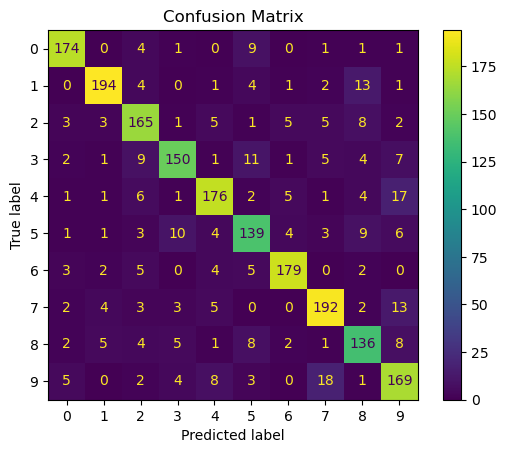

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train[:2000], y_train[:2000], cv=3)
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred)
plt.title("Confusion Matrix")
plt.show()

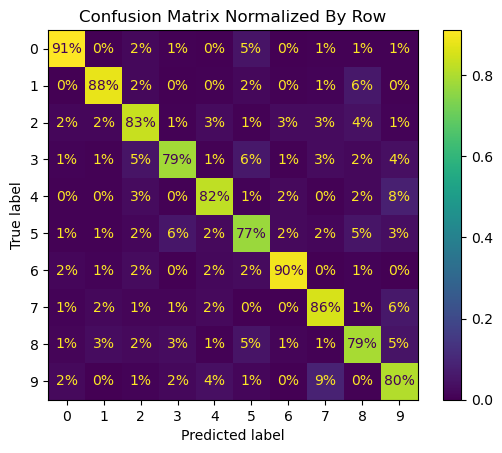

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, normalize="true", values_format=".0%")
plt.title("Confusion Matrix Normalized By Row")
plt.show()

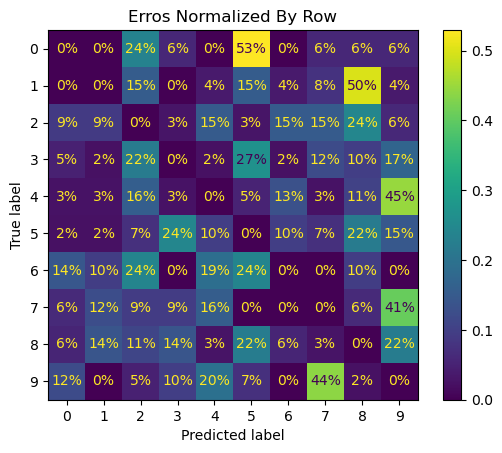

In [20]:
sample_weight = (y_train_pred != y_train[:2000])
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, sample_weight=sample_weight ,normalize="true", values_format=".0%")
plt.title("Erros Normalized By Row")
plt.show()

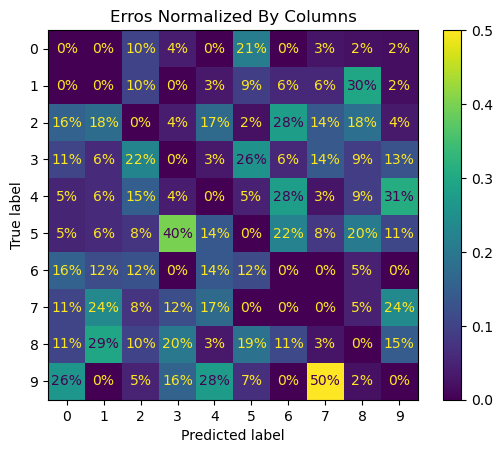

In [21]:
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, sample_weight=sample_weight ,normalize="pred", values_format=".0%")
plt.title("Erros Normalized By Columns")
plt.show()